<a href="https://colab.research.google.com/github/OlgaPolovnikova/DataSciencePortfolio/blob/main/Covid_19_Explaratory_Data_Analytics_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analytics & Time Series Forecasting 


#Import Pandas library and Seaborn

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

covid_df = pd.read_csv('/gdrive/MyDrive/Data Science/DataSets/owid-covid-data.csv',index_col="date", parse_dates=True)

#Read the csv file and display the first 10 instances:
covid_df.head(10)

Mounted at /gdrive
/gdrive


,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-29,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-03-01,AFG,Asia,Afghanistan,5.0,0.0,0.714,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-03-02,AFG,Asia,Afghanistan,5.0,0.0,0.000,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-03-03,AFG,Asia,Afghanistan,5.0,0.0,0.000,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


display the last 10 instances:

In [3]:
covid_df.tail(10)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2022-02-24,ZWE,Africa,Zimbabwe,234967.0,378.0,338.429,5390.0,2.0,1.286,15568.801,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2022-02-25,ZWE,Africa,Zimbabwe,235467.0,500.0,348.143,5392.0,2.0,1.000,15601.930,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2022-02-26,ZWE,Africa,Zimbabwe,235803.0,336.0,368.429,5393.0,1.0,1.000,15624.193,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2022-02-27,ZWE,Africa,Zimbabwe,235803.0,0.0,350.143,5393.0,0.0,1.000,15624.193,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2022-02-28,ZWE,Africa,Zimbabwe,236380.0,577.0,401.286,5395.0,2.0,1.286,15662.425,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2022-03-01,ZWE,Africa,Zimbabwe,236871.0,491.0,413.000,5395.0,0.0,1.000,15694.959,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2022-03-02,ZWE,Africa,Zimbabwe,237503.0,632.0,416.286,5396.0,1.0,1.143,15736.835,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2022-03-03,ZWE,Africa,Zimbabwe,237503.0,0.0,362.286,5396.0,0.0,0.857,15736.835,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2022-03-04,ZWE,Africa,Zimbabwe,238739.0,1236.0,467.429,5397.0,1.0,0.714,15818.731,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 166326 entries, 2020-02-24 to 2022-03-05
Data columns (total 66 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    166326 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    166326 non-null  object 
 3   total_cases                                 163293 non-null  float64
 4   new_cases                                   163133 non-null  float64
 5   new_cases_smoothed                          161150 non-null  float64
 6   total_deaths                                145451 non-null  float64
 7   new_deaths                                  145487 non-null  float64
 8   new_deaths_smoothed                         143390 non-null  float64
 9   total_cases_per_million                     162535 non

Filter Data for Australia and print first(last) 5 instances

In [3]:

#filter data for Australia

df_AU = covid_df[covid_df['location'] == 'Australia']

print(df_AU.head())
print(df_AU.tail())


           iso_code continent   location  total_cases  new_cases  \
date                                                               
2020-01-26      AUS   Oceania  Australia          4.0        4.0   
2020-01-27      AUS   Oceania  Australia          5.0        1.0   
2020-01-28      AUS   Oceania  Australia          5.0        0.0   
2020-01-29      AUS   Oceania  Australia          6.0        1.0   
2020-01-30      AUS   Oceania  Australia          9.0        3.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
date                                                                            
2020-01-26                 NaN           NaN         NaN                  NaN   
2020-01-27                 NaN           NaN         NaN                  NaN   
2020-01-28                 NaN           NaN         NaN                  NaN   
2020-01-29                 NaN           NaN         NaN                  NaN   
2020-01-30                 NaN       

# Timeline - COVID19 in the world

Text(0.5, 0, 'Date')

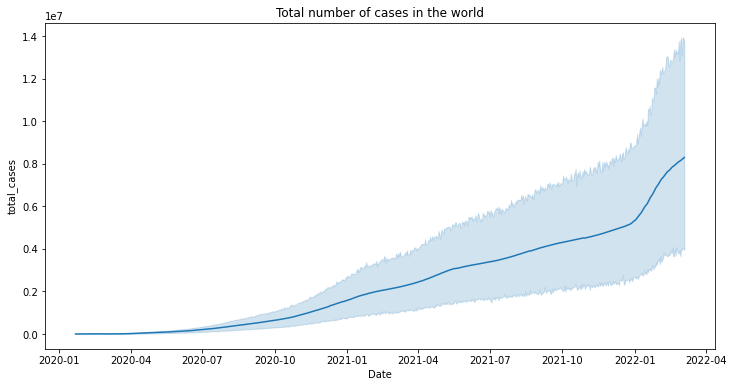

In [6]:
plt.figure(figsize=(12,6))
#Add title
plt.title("Total number of cases in the world")
sns.lineplot(data= covid_df['total_cases'])
#Line chart showing the total number of COVID-19 cases over time
#Add label for horizontal axis
plt.xlabel("Date")

Text(0.5, 0, 'Date')

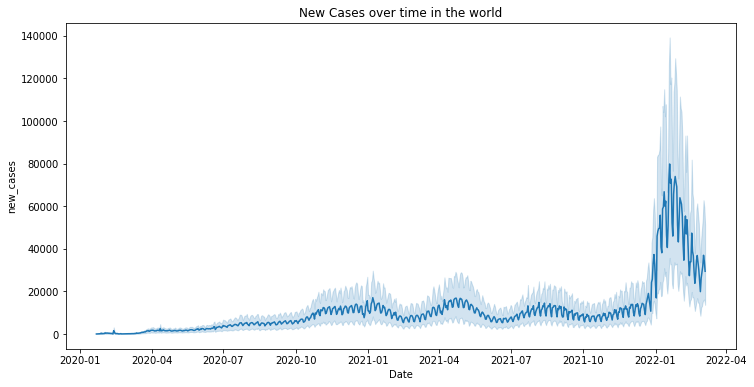

In [7]:
plt.figure(figsize=(12,6))
#Add title
plt.title("New Cases over time in the world")
#Line chart showing the number of new cases of COVID-19 over time
sns.lineplot(data=covid_df ['new_cases'])
#Add label for horizontal axis
plt.xlabel("Date")

In the chart above we can see the four waves that affected the entire world:

*   original variant
*   beta
*   delta
*   omicron

Omicron is the fastest spreading virus,its pick is four times higher than original COVID-19 wave.




Text(0.5, 0, 'Date')

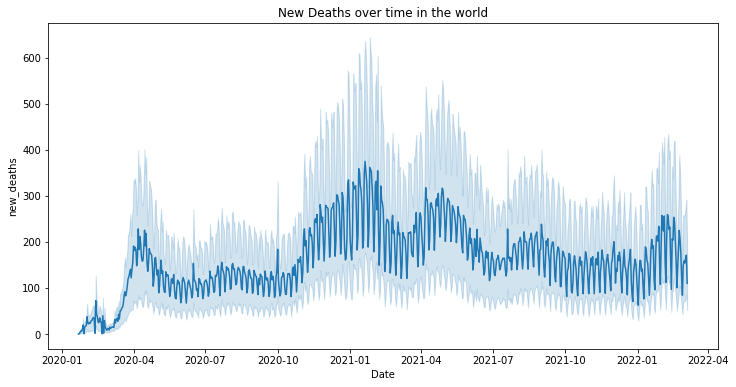

In [9]:
plt.figure(figsize=(12,6))
#Add title
plt.title("New Deaths over time in the world")
#Line chart showing the number of new cases of COVID-19 over time
sns.lineplot(data=covid_df ['new_deaths'])
#Add label for horizontal axis
plt.xlabel("Date")

Omicron is less severe comparing to first Covid-19 variant, thanks to vaccination providing protection

Text(0.5, 0, 'Date')

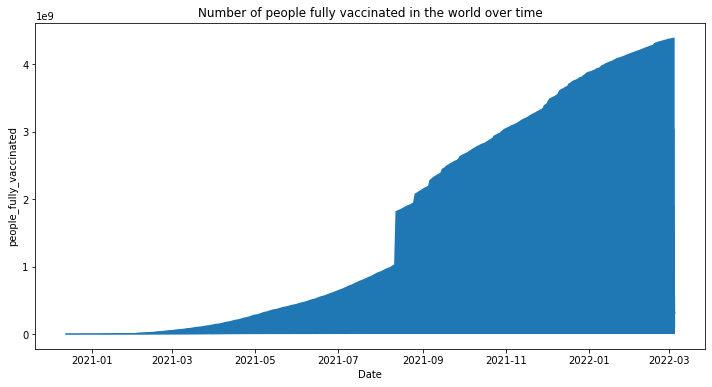

In [10]:
plt.figure(figsize=(12,6))
#Add title
plt.title("Number of people fully vaccinated in the world over time")
sns.lineplot(data= covid_df['people_fully_vaccinated'])
plt.fill_between(covid_df.index, covid_df.people_fully_vaccinated)
#Add label for horizontal axis
plt.xlabel("Date")

# Timeline COVID-19 in Australia



Text(0.5, 0, 'Date')

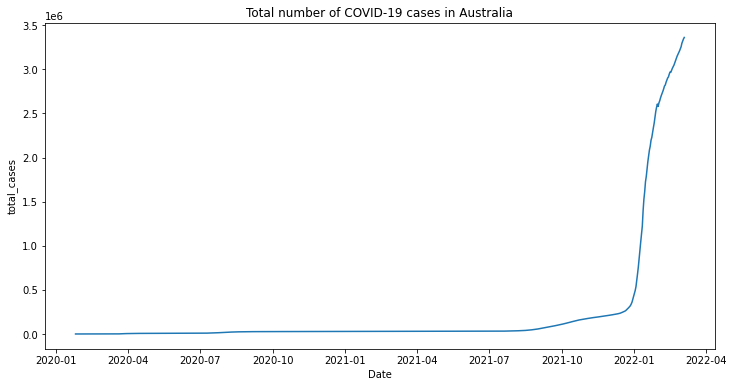

In [8]:
plt.figure(figsize=(12,6))
#Add title
plt.title("Total number of COVID-19 cases in Australia")
sns.lineplot(data= df_AU['total_cases'])
#Add label for horizontal axis
plt.xlabel("Date")

Text(0.5, 0, 'Date')

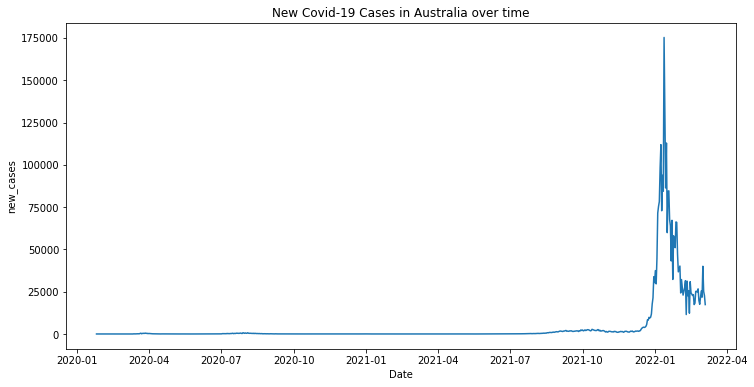

In [9]:
plt.figure(figsize=(12,6))
#Add title
plt.title("New Covid-19 Cases in Australia over time")
#Line chart showing the number of new cases of COVID-19 over time
sns.lineplot(data=df_AU ['new_cases'])
#Add label for horizontal axis
plt.xlabel("Date")

Text(0.5, 0, 'Date')

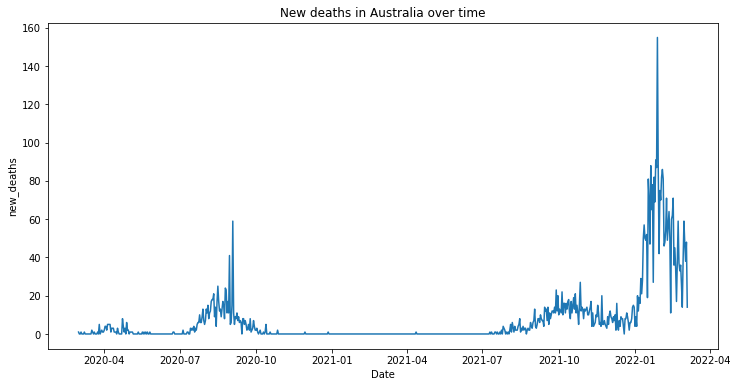

In [14]:
plt.figure(figsize=(12,6))
#Add title
plt.title("New deaths in Australia over time")
sns.lineplot(data= df_AU['new_deaths'])
#Add label for horizontal axis
plt.xlabel("Date")

Text(0.5, 0, 'Date')

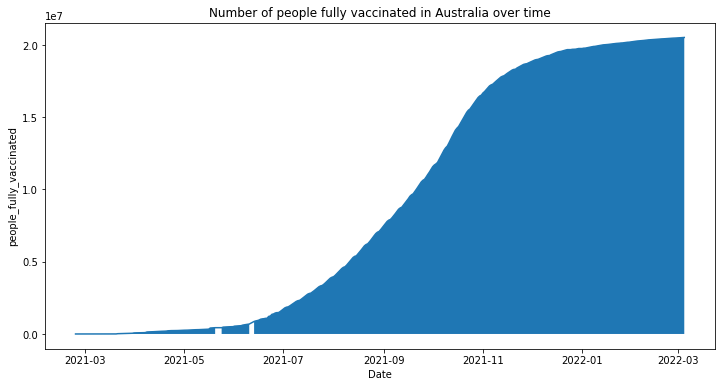

In [15]:
plt.figure(figsize=(12,6))
#Add title
plt.title("Number of people fully vaccinated in Australia over time")
sns.lineplot(data= df_AU['people_fully_vaccinated'])
plt.fill_between(df_AU.index, df_AU.people_fully_vaccinated)
#Add label for horizontal axis
plt.xlabel("Date")

In [10]:
df_AU

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-26,AUS,Oceania,Australia,4.0,4.0,NaN,NaN,NaN,NaN,0.155,...,13.0,16.5,NaN,3.84,83.44,0.944,-532.6,-4.47,-0.48,-20.652843
2020-01-27,AUS,Oceania,Australia,5.0,1.0,NaN,NaN,NaN,NaN,0.194,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
2020-01-28,AUS,Oceania,Australia,5.0,0.0,NaN,NaN,NaN,NaN,0.194,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
2020-01-29,AUS,Oceania,Australia,6.0,1.0,NaN,NaN,NaN,NaN,0.233,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
2020-01-30,AUS,Oceania,Australia,9.0,3.0,NaN,NaN,NaN,NaN,0.349,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,AUS,Oceania,Australia,3256772.0,21755.0,22503.286,5269.0,59.0,34.857,126289.150,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
2022-03-02,AUS,Oceania,Australia,3296784.0,40012.0,24669.000,5316.0,47.0,36.286,127840.711,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
2022-03-03,AUS,Oceania,Australia,3321943.0,25159.0,24453.143,5354.0,38.0,37.000,128816.312,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
